# Data Science with Pandas

* Matt Burton 
* Data Dojo 
* November 13th, 2018

## Doing Data Science with Python

* Python is a very popular programming language for *doing* data science
* Is a powerful and expressive interpreted programming lanaguage
* Is fast enough for many data processing tasks
* Can hook into lower level lanaguages like C and FORTRAN when necessary
* Has a HUGE user community and many powerful 3rd party libraries

### Essential Python Libraries for Data Science

* **NumPy** - A low-level numerical computing library with a fast multidimensional array object *ndarray*
* **pandas** - A higher level library with several user-friendly data structures for numerical computing and data processing. 
* **matplotlib** - The most used (but not necessarily loved) Python library for data visualizations. 
* **Jupyter** - A platform for interactive computing and data analysis. Allows for the creation of *notebooks* (like this one here) for conducting and publishing data workflows. IT IS GREAT!!!
* **scikit-learn** - The go-to library for machine learning in Python. Implements many popular ML algorithms, has a nice API, and has many useful helper fuctions.
* **statsmodel** - A library for "classical" (frequentist) statistics (think ANOVA). Mirrors many of the models in R. 


* All of these libraries work well together making the Python data sceince ecosystem.

## Dive into Pandas


* Pandas is a third party library for doing data analysis
* It is a foundational component of Python data science
* Developed by someone in the finance industry, but is now used by everyone
* Vanilla Python can do many of the same things, but Pandas is *faster*
* The core of Pandas are the data structures

### Pandas Data Structures

* To understand Pandas, which is hard, you need to start with three data structures
    * Series - For one dimensional data
    * Dataframe - For two dimensional data
    * Index - For naming, selecting, and transforming data within a Pandas Series or Dataframe 

### Series

* A one-dimensional array of indexed data
* Kind of like a blend of a Python list and dictionary
* You can create them from a Python list


In [25]:
import pandas as pd

In [26]:
my_list = [0.25, 0.5, 0.75, 1.0]
data = pd.Series(my_list)
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

* You can index a Series just like a list
* Use index notation to grab the 2nd element of `data`

In [27]:
# remember, index by zero so 1 is the second element
data[1]

0.5

* You can also slice Series as well
* Use slices to grab the 2nd and 3rd elements of this series

In [28]:
# slicing the 2nd & 3rd elements 
data[1:3]


1    0.50
2    0.75
dtype: float64

* Series also act like Python dictionaries

In [29]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

* You can use indexing and slicing like above, but now with keys instead of numbers!


In [30]:
population['California']

38332521

* Like a Python dictionary, a Series is a list of key/value pairs
* But these are *ordered*, which means you can do slicing
* Try slicing this series, but with keys instead of numbers!

In [31]:
# Hint: Use the same : notation, but use the state names listed above
# Your code here:
population.loc['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

* There are a couple ways of creating `Series` objects

In [32]:
# From a list with an implicit index
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [33]:
# From a list with an *explicit* index
pd.Series([2, 4, 6], index=['a','b','c'])

a    2
b    4
c    6
dtype: int64

In [34]:
# From a dictionary so keys are the index and get sorded by keys
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

### DataFrame

* `DataFrames` are the real workhorse of Pandas and Python Data Science
* We will be spending a lot of time with data inside of Dataframes, so buckle up!
* `DataFrames` contain two-dimensional data, just like an Excel spreadsheet
* In practice, a `DataFrame` is a bunch of `Series` lined up next to each other

In [35]:
# Start with our population Series define above
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [36]:
# Then create an area Series
area_dict = {'Illinois': 149995, 'California': 423967, 
             'Texas': 695662, 'Florida': 170312, 
             'New York': 141297}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [37]:
# Now mash them together into a DataFrame
states = pd.DataFrame({'population': population,
                       'area': area}   )
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


* Pandas automatically lines everything up because they have shared index values

In [38]:
print(area.index)
print(population.index)
print(states.index)

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')
Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')
Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')


* A `DataFrame` actually has two indexes
* One for the rows (as seen above)
* An another for the columes

In [39]:
states.columns

Index(['area', 'population'], dtype='object')

## Indexes

* Pandas `Series` and `DataFrames` are containers for data
* Index (and Indexing) are the mechanism to make that data retrievable
* In a `Series` the index is the key to each value in the list
* In a `DataFrame` the index is the column headers, but also row headers
* Indexing allows you to merge or join disparate datasets together

## Real world data processing 

Let's write script that parses information out of an mbox email archive, `mbox-short.txt`, and put it into a Pandas Dataframe.

* Parse every piece of information into a dictionary
* Aggregate all of those dictionaries into a list
* Create a Pandas DataFrame from that list of dictionaries


So we will transform this:
```
From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
```
into this:
```
{'year': '2008', 'month': 'Jan', 'dayofweek': 'Sat', 'address': 'stephen.marquard@uct.ac.za', 'day': '5', 'time': '09:14:16'}
```
into this:
```
address      stephen.marquard@uct.ac.za
day                                   5
dayofweek                           Sat
month                               Jan
time                           09:14:16
year                               2008
Name: 0, dtype: object
```


* Download the data manually with [this link](http://www.py4e.com/code3/mbox.txt) or run the cell below if you are on a Unix based system
* If you are running this with Binder the data should already be downloaded.

In [55]:
# Run this cell to download the data
!wget -nv https://www.py4e.com/code3/mbox.txt -O mbox.txt

2017-11-13 14:15:45 URL:https://www.py4e.com/code3/mbox.txt [6687002] -> "mbox.txt" [1]


In [57]:
!head -n 10 mbox.txt

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])


* What we want to do is parse the text file above into the nicely structured data below

In [72]:
# Quick and dirty code that parses the mbox file
with open("mbox.txt", encoding="utf-8") as email_file:
    # create a list to contain all the data
    # list comprehensions foo
    email_data = [line.split()[1:7] 
                  for line in email_file 
                  if "From " in line]
     
cols = ["address", 
         "dayofweek",
         "month",
         "day",
         "time",
         "year"]
emails_dataframe = pd.DataFrame(email_data, columns=cols)
emails_dataframe

,address,dayofweek,month,day,time,year
0,stephen.marquard@uct.ac.za,Sat,Jan,5,09:14:16,2008
1,louis@media.berkeley.edu,Fri,Jan,4,18:10:48,2008
2,zqian@umich.edu,Fri,Jan,4,16:10:39,2008
3,rjlowe@iupui.edu,Fri,Jan,4,15:46:24,2008
4,zqian@umich.edu,Fri,Jan,4,15:03:18,2008
5,rjlowe@iupui.edu,Fri,Jan,4,14:50:18,2008
6,cwen@iupui.edu,Fri,Jan,4,11:37:30,2008
7,cwen@iupui.edu,Fri,Jan,4,11:35:08,2008
8,gsilver@umich.edu,Fri,Jan,4,11:12:37,2008
9,gsilver@umich.edu,Fri,Jan,4,11:11:52,2008


* Once your data is in a Pandas `DataFrame` you can easily use a ton of analytical tools
* You just have to get your data to fit into a dataframe
* Getting data to fit is a big part of the "data janitor" work...it is the craft of data carpentry
* However, as we will see, there is still a lot of carpentry work to do once your data fits into a `DataFrame`
* This dataframe allows us ask questions of the data, if you know how to ask.
* `value_counts()` is a `Series` method that tabulates the number of values.
* First we need to extract the column we want

In [74]:
emails_dataframe['dayofweek']

0       Sat
1       Fri
2       Fri
3       Fri
4       Fri
5       Fri
6       Fri
7       Fri
8       Fri
9       Fri
10      Fri
11      Fri
12      Fri
13      Fri
14      Fri
15      Fri
16      Fri
17      Fri
18      Fri
19      Fri
20      Fri
21      Thu
22      Thu
23      Thu
24      Thu
25      Thu
26      Thu
27      Thu
28      Thu
29      Thu
       ... 
1768    Fri
1769    Fri
1770    Fri
1771    Fri
1772    Fri
1773    Fri
1774    Fri
1775    Fri
1776    Fri
1777    Fri
1778    Fri
1779    Fri
1780    Fri
1781    Fri
1782    Fri
1783    Fri
1784    Fri
1785    Thu
1786    Thu
1787    Thu
1788    Thu
1789    Thu
1790    Thu
1791    Thu
1792    Thu
1793    Thu
1794    Thu
1795    Thu
1796    Thu
1797    Thu
Name: dayofweek, Length: 1798, dtype: object

In [75]:
emails_dataframe['dayofweek'].value_counts()

Thu        392
Tue        372
Fri        315
Mon        299
Wed        292
Sun         66
Sat         61
Updated      1
Name: dayofweek, dtype: int64

### Vectorized String Operations

* There is a Pandas way of doing this that is much more terse and compact
* Pandas has a set of String operations that do much painful work for you
* Especially handling bad data!

* So now lets try tabulating the number of institutions the Pandas way

In [76]:
# use a vectorized string operation over the email addresses
emails_dataframe['address'].str.split("@")

0          [stephen.marquard, uct.ac.za]
1            [louis, media.berkeley.edu]
2                     [zqian, umich.edu]
3                    [rjlowe, iupui.edu]
4                     [zqian, umich.edu]
5                    [rjlowe, iupui.edu]
6                      [cwen, iupui.edu]
7                      [cwen, iupui.edu]
8                   [gsilver, umich.edu]
9                   [gsilver, umich.edu]
10                    [zqian, umich.edu]
11                  [gsilver, umich.edu]
12                 [wagnermr, iupui.edu]
13                    [zqian, umich.edu]
14           [antranig, caret.cam.ac.uk]
15      [gopal.ramasammycook, gmail.com]
16            [david.horwitz, uct.ac.za]
17            [david.horwitz, uct.ac.za]
18            [david.horwitz, uct.ac.za]
19            [david.horwitz, uct.ac.za]
20         [stephen.marquard, uct.ac.za]
21           [louis, media.berkeley.edu]
22           [louis, media.berkeley.edu]
23             [ray, media.berkeley.edu]
24              

* Now we have a Series of list objects (you can tell from the square brackets)
* Lets get just the 2nd element of those lists. We can do that with [vectorized item access](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.10-Working-With-Strings.ipynb#Vectorized-item-access-and-slicing)

In [77]:
# 
emails_dataframe['address'].str.split("@").str.get(1)

0                uct.ac.za
1       media.berkeley.edu
2                umich.edu
3                iupui.edu
4                umich.edu
5                iupui.edu
6                iupui.edu
7                iupui.edu
8                umich.edu
9                umich.edu
10               umich.edu
11               umich.edu
12               iupui.edu
13               umich.edu
14         caret.cam.ac.uk
15               gmail.com
16               uct.ac.za
17               uct.ac.za
18               uct.ac.za
19               uct.ac.za
20               uct.ac.za
21      media.berkeley.edu
22      media.berkeley.edu
23      media.berkeley.edu
24               iupui.edu
25               iupui.edu
26               iupui.edu
27      media.berkeley.edu
28               iupui.edu
29               umich.edu
               ...        
1768             umich.edu
1769             umich.edu
1770             iupui.edu
1771             iupui.edu
1772             iupui.edu
1773             iupui.edu
1

In [78]:
emails_dataframe['institution'] = emails_dataframe['address'].str.split("@").str.get(1)
emails_dataframe

,address,dayofweek,month,day,time,year,institution
0,stephen.marquard@uct.ac.za,Sat,Jan,5,09:14:16,2008,uct.ac.za
1,louis@media.berkeley.edu,Fri,Jan,4,18:10:48,2008,media.berkeley.edu
2,zqian@umich.edu,Fri,Jan,4,16:10:39,2008,umich.edu
3,rjlowe@iupui.edu,Fri,Jan,4,15:46:24,2008,iupui.edu
4,zqian@umich.edu,Fri,Jan,4,15:03:18,2008,umich.edu
5,rjlowe@iupui.edu,Fri,Jan,4,14:50:18,2008,iupui.edu
6,cwen@iupui.edu,Fri,Jan,4,11:37:30,2008,iupui.edu
7,cwen@iupui.edu,Fri,Jan,4,11:35:08,2008,iupui.edu
8,gsilver@umich.edu,Fri,Jan,4,11:12:37,2008,umich.edu
9,gsilver@umich.edu,Fri,Jan,4,11:11:52,2008,umich.edu


In [79]:
emails_dataframe['institution'].value_counts()

iupui.edu             536
umich.edu             491
indiana.edu           178
caret.cam.ac.uk       157
vt.edu                110
uct.ac.za              96
media.berkeley.edu     56
ufp.pt                 28
gmail.com              25
txstate.edu            17
whitman.edu            17
et.gatech.edu          17
lancaster.ac.uk        14
bu.edu                 14
stanford.edu           12
loi.nl                  9
unicon.net              9
rsmart.com              8
fhda.edu                1
ucdavis.edu             1
utoronto.ca             1
Name: institution, dtype: int64

In [80]:
emails_dataframe.to_csv("email-data-with-institution.csv", index=False)

### Playing with time on real data

* Let's look at the [311 data for the city of Pittsburgh](https://data.wprdc.org/dataset/311-data) from the WPRDC
* You can either download the CSV file or give the URL directly to Pandas

In [86]:
# load the 311 data directly from the WPRDC and parse dates directly
pgh_311_data = pd.read_csv("https://data.wprdc.org/datastore/dump/40776043-ad00-40f5-9dc8-1fde865ff571",
                           index_col="CREATED_ON", 
                           parse_dates=True)
pgh_311_data.head()

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,
2017-04-07 11:09:00,133283,143924,Illegal Parking,Call Center,Police - Zones 1-6,Crafton Heights,2.0,28.0,4.200328e+10,5.0,28.0,6.0,1-17,-80.049437,40.440559,APPROXIMATE
2017-08-25 17:05:00,171332,182424,Weeds/Debris,Call Center,"Permits, Licenses and Inspections",Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-18,-79.897514,40.463366,EXACT
2017-08-25 17:17:00,171334,182427,Weeds/Debris,Call Center,"Permits, Licenses and Inspections",Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,-79.926362,40.454343,EXACT
2017-05-31 09:57:00,146970,157831,Abandoned Vehicle (parked on street),Call Center,Police - AVU,Crawford-Roberts,6.0,3.0,4.200303e+10,3.0,3.0,2.0,2-1,-79.985495,40.444258,APPROXIMATE
2017-04-07 11:14:00,133284,143925,Abandoned Vehicle (parked on street),Website,Police - AVU,South Side Slopes,3.0,16.0,4.200316e+10,4.0,16.0,3.0,4-24,-79.970518,40.423151,APPROXIMATE


In [87]:
pgh_311_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187363 entries, 2017-04-07 11:09:00 to 2017-10-02 09:11:00
Data columns (total 16 columns):
_id                      187363 non-null int64
REQUEST_ID               187363 non-null int64
REQUEST_TYPE             187363 non-null object
REQUEST_ORIGIN           187363 non-null object
DEPARTMENT               185936 non-null object
NEIGHBORHOOD             177152 non-null object
COUNCIL_DISTRICT         177396 non-null float64
WARD                     177174 non-null float64
TRACT                    178065 non-null float64
PUBLIC_WORKS_DIVISION    177175 non-null float64
PLI_DIVISION             95497 non-null float64
POLICE_ZONE              177143 non-null float64
FIRE_ZONE                177293 non-null object
X                        180001 non-null float64
Y                        180001 non-null float64
GEO_ACCURACY             187363 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 24.3+ MB


* Now that the dataframe has been indexed by time we can select 311 complains by time

In [88]:
# Select 311 complaints on November 13th 2017
pgh_311_data['2017-11-13']

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,
2017-11-13 11:29:00,187295,198533,Weeds/Debris,Call Center,"Permits, Licenses and Inspections",Swisshelm Park,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-19,-79.901529,40.423191,EXACT
2017-11-13 11:22:00,187291,198526,Litter,Website,DPW - Street Maintenance,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,1-11,-79.986143,40.469916,EXACT
2017-11-13 11:23:00,187292,198527,Fire Safety System Not Working,Control Panel,"Permits, Licenses and Inspections",Perry North,1.0,26.0,4.200326e+10,1.0,26.0,1.0,1-15,-80.018731,40.493395,APPROXIMATE
2017-11-13 11:36:00,187297,198535,Weeds/Debris,Call Center,"Permits, Licenses and Inspections",Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-7,-79.991916,40.403706,EXACT
2017-11-13 11:42:00,187298,198536,Junk Vehicles,Call Center,"Permits, Licenses and Inspections",East Liberty,9.0,8.0,4.200311e+10,2.0,8.0,5.0,3-23,-79.930050,40.461118,APPROXIMATE
2017-11-13 11:43:00,187299,198537,Building Without a Permit,Call Center,"Permits, Licenses and Inspections",East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-5,-79.997156,40.457074,APPROXIMATE
2017-11-13 05:08:00,187166,198409,Vacant Building,Website,"Permits, Licenses and Inspections",Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,-80.039172,40.445560,EXACT
2017-11-13 05:10:00,187167,198410,Weeds/Debris,Website,"Permits, Licenses and Inspections",Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,-80.039172,40.445560,EXACT
2017-11-13 05:15:00,187168,198411,Building Maintenance,Website,"Permits, Licenses and Inspections",Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,-80.036477,40.443972,APPROXIMATE


In [89]:
# Select the times just around new years celebration of 2016
pgh_311_data["2015-12-31 20:00:00":"2016-01-01 02:00:00"]

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,
2016-01-01 01:14:00,30998,39132,Potholes,Website,DPW - Street Maintenance,South Side Flats,3.0,17.0,4.200317e+10,4.0,NaN,3.0,4-24,-79.984121,40.430102,EXACT


* Someone clearly had a very roudy new years 

### Grouping time with the `resample` method

* You use the `resample()` method to *split* time into groups
* Then you can *apply* the regular aggregation functions 

In [90]:
# compute the mean of complaints per quarter...
# note this doesn't make sense, but works anyway
pgh_311_data.resample("Q").mean()

,_id,REQUEST_ID,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y
CREATED_ON,,,,,,,,,,
2015-03-31,1.000000,538.000000,6.000000,21.000000,4.200398e+10,1.000000,NaN,1.000000,-80.030760,40.453507
2015-06-30,47127.817569,6144.383096,4.983079,16.513195,4.200329e+10,3.096472,15.936364,3.734410,-79.840663,40.373358
2015-09-30,10405.334341,18660.396136,4.875095,16.463288,4.200326e+10,3.130591,16.364162,3.644728,-79.052989,39.974662
2015-12-31,24464.251298,32598.232661,4.846424,16.159870,4.200323e+10,3.102088,16.451104,3.584618,-79.144511,40.020613
2016-03-31,40634.024554,48807.003813,4.765088,16.045617,4.200325e+10,3.170543,15.627866,3.585267,-79.304771,40.101024
2016-06-30,62825.821481,71950.457229,4.811382,16.520353,4.200325e+10,3.066560,15.915982,3.576896,-79.075061,39.986560
2016-09-30,87535.487534,96283.969160,4.815088,16.521921,4.200323e+10,3.051743,16.137771,3.554667,-78.687908,39.790680
2016-12-31,93988.949770,115679.276362,4.832730,15.774362,4.200323e+10,3.029536,15.763679,3.469406,-78.662107,39.779183
2017-03-31,122872.847808,132805.471905,5.041762,15.702070,4.200322e+10,3.006275,15.702070,3.553079,-79.131370,40.018152


In [91]:
# count the number of complaints per month
pgh_311_data.resample("M").count()

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,
2015-02-28,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
2015-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-04-30,2067,2067,2067,2067,2067,2031,2032,2033,2059,2033,53,2031,2039,2065,2065,2067
2015-05-31,4020,4020,4020,4020,4017,3949,3947,3951,3997,3951,124,3951,3958,4004,4004,4020
2015-06-30,4443,4443,4443,4443,4442,4357,4363,4361,4404,4361,153,4361,4367,4409,4409,4443
2015-07-31,5140,5140,5140,5140,5135,5014,5020,5017,5068,5017,179,5013,5024,5102,5102,5140
2015-08-31,4337,4337,4337,4337,4330,4165,4175,4167,4208,4167,176,4166,4177,4267,4267,4337
2015-09-30,4084,4084,4084,4084,4044,3914,3919,3918,3954,3918,164,3918,3918,4016,4016,4084
2015-10-31,4069,4069,4069,4069,4065,3921,3929,3927,3951,3927,203,3925,3931,3989,3989,4069


* Ok, these data are *begging* to be visualized, so let me show you one last feature of Pandas...Visalization!

In [92]:
# load up the data visualization libraries
%matplotlib inline


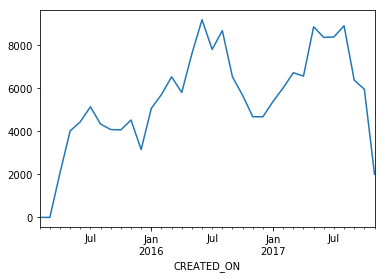

In [93]:
# Create a graph of the monthly complaint counts
pgh_311_data['REQUEST_ID'].resample("M").count().plot()

## Further Resources

* I highly recommend this book, it covers NumPy, pandas, matplotlib, and scikit-learn. 
* It is well written and up to date!

![Python Data Science Handbook](https://covers.oreillystatic.com/images/0636920034919/lrg.jpg)

* If you want to go deeper into pandas, you can't do better than this book. 
* The 2nd edition just came out and it is written by Wes McKinney, the creator of pandas!

![Python Data Analysis: *2nd Edition*](https://covers.oreillystatic.com/images/0636920050896/lrg.jpg)